### Коломієць Микола Ом-4, Варіант 8

### Ізольована популяція варіант 2

In [1]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
import scipy as scp

In [2]:
t = sp.Symbol('t')
P = sp.Function('P')(t)

### Запишемо диференціальне рівняння з умови задачі

In [3]:
equation = sp.Eq(P.diff(t) - 0.004 * P* (P - 180), 0)
equation

Eq(-0.004*(P(t) - 180)*P(t) + Derivative(P(t), t), 0)

### Розв'яжемо диференціальне рівняння з різними початковими умовами

In [4]:
res1 = sp.dsolve(equation, P, ics={P.subs({t:0}):250}).rhs
res2 = sp.dsolve(equation, P, ics={P.subs({t:0}):120}).rhs


### Розв'язки

In [5]:
res1

642.857142857143/(3.57142857142857 - exp(0.72*t))

In [6]:
res2

-360.0/(-exp(0.72*t) - 2.0)

In [7]:
res1 = sp.lambdify((t), res1)
res2 = sp.lambdify((t), res2)

### Чисельності популяцій при t = 1

In [8]:
print("P1(1) = {}, P2(1) = {}".format(res1(1), res2(1)))

P1(1) = 423.77001240440063, P2(1) = 88.7916957307155


In [9]:
T = np.linspace(0, 1.5, 100)
y1 = res1(T)
y2 = res2(T)

### Графіки

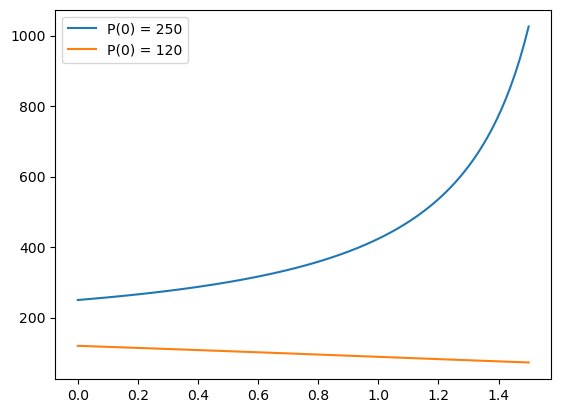

In [10]:
fig, ax = plt.subplots()
ax.plot(T, y1)[0].set_label("P(0) = 250")
ax.plot(T, y2)[0].set_label("P(0) = 120")
ax.legend()
plt.show()

### З графіків видно, що синя популяція експоненційно зростає, а помаранчева лінійно вимирає

### Задача Леслі Варіант 8

In [11]:
L =sp.Matrix([[0, 0, 0.19, 0.44, 0.5, 0.5, 0.45], [0.87, 0, 0, 0, 0, 0, 0], [0, 0.87, 0, 0, 0, 0, 0], [0, 0, 0.87, 0, 0, 0, 0], [0, 0, 0, 0.87, 0, 0, 0], [0, 0, 0, 0, 0.87, 0, 0], [0, 0, 0, 0, 0, 0.87, 0.8]])
L

Matrix([
[   0,    0, 0.19, 0.44,  0.5,  0.5, 0.45],
[0.87,    0,    0,    0,    0,    0,    0],
[   0, 0.87,    0,    0,    0,    0,    0],
[   0,    0, 0.87,    0,    0,    0,    0],
[   0,    0,    0, 0.87,    0,    0,    0],
[   0,    0,    0,    0, 0.87,    0,    0],
[   0,    0,    0,    0,    0, 0.87,  0.8]])

In [12]:
lambdaa = [round(x, 2) for x in  L.eigenvals().keys()]
lambdaa

[1.10, 0.2 - 0.59*I, -0.19 - 0.35*I, -0.46, 0.2 + 0.59*I, -0.19 + 0.35*I, 0.14]

### Швидкість росту популяції

In [13]:
lamda_L = max([sp.re(x) for x in lambdaa])
lamda_L

1.10

### Вектор стійкої вікової популяції

In [14]:
eigenvectors = {round(x, 2): [Mi.evalf(10) for Mi in M] for x,y,M in L.eigenvects()}
xL = eigenvectors[lamda_L][0]
xL = sp.simplify(xL / xL[5])
xL = xL.evalf(3)
xL = sp.re(xL) # він і так не комплексний але там 10^-12, з цим рядком виглядає красивіше
xL

Matrix([
[3.21],
[2.54],
[2.01],
[1.59],
[1.26],
[ 1.0],
[2.91]])

### Частка особин, які можна виловити

In [15]:
(1 - 1 / lamda_L) * 100

9.09

In [16]:
L =sp.Matrix([[0, 0, 0.19, 0.44, 0.5, 0.5, 0.45], [0.9, 0, 0, 0, 0, 0, 0], [0, 0.9, 0, 0, 0, 0, 0], [0, 0, 0.9, 0, 0, 0, 0], [0, 0, 0, 0.9, 0, 0, 0], [0, 0, 0, 0, 0.9, 0, 0], [0, 0, 0, 0, 0, 0.9, 0.85]])
L

Matrix([
[  0,   0, 0.19, 0.44, 0.5, 0.5, 0.45],
[0.9,   0,    0,    0,   0,   0,    0],
[  0, 0.9,    0,    0,   0,   0,    0],
[  0,   0,  0.9,    0,   0,   0,    0],
[  0,   0,    0,  0.9,   0,   0,    0],
[  0,   0,    0,    0, 0.9,   0,    0],
[  0,   0,    0,    0,   0, 0.9, 0.85]])

In [17]:
lambdaa = [round(x, 2) for x in  L.eigenvals().keys()]
lambdaa

[1.14, 0.2 - 0.62*I, -0.22 - 0.38*I, -0.50, -0.22 + 0.38*I, 0.2 + 0.62*I, 0.26]

### Швидкість росту популяції

In [18]:
lamda_L = max([sp.re(x) for x in lambdaa])
lamda_L

1.14

### Швидкість росту трохи збільшилась адже збільшився коефіцієнт виживання

### Вектор стійкої вікової популяції

In [19]:
eigenvectors = {round(x, 2): [Mi.evalf(10) for Mi in M] for x,y,M in L.eigenvects()}
xL = eigenvectors[lamda_L][0]
xL = sp.simplify(xL / xL[5])
xL = xL.evalf(3)
xL = sp.re(xL) # він і так не комплексний але там 10^-12, з цим рядком виглядає красивіше
xL

Matrix([
[ 3.2],
[2.53],
[2.01],
[1.59],
[1.26],
[ 1.0],
[3.15]])

### Суттєво змінилось лише співвідношення з останньою віковою групою (найстарші) адже суттєво збільшився лише коефіцієн виживання

### Частка особин, які можна виловити

In [20]:
(1 - 1 / lamda_L) * 100

12.3

### Швидкість росту збільшилась, а отже і частка особин, яку можна виловити, теж

### Хижак жертва Варіант 8

In [21]:
e1 = 6
g1 = 3
x, y = sp.symbols("x y", cls=sp.Function)
d1 = sp.Eq(sp.diff(x(t), t), x(t) * (e1 - g1 * y(t)))
e2 = 2
g2 = 4
d2 = sp.Eq(sp.diff(y(t), t), y(t) *(-e2 + g2 * x(t)))
sp.pprint(d1)
sp.pprint(d2)

d                           
──(x(t)) = (6 - 3⋅y(t))⋅x(t)
dt                          
d                           
──(y(t)) = (4⋅x(t) - 2)⋅y(t)
dt                          


In [22]:
def d_1(t, Y):
    x, y = Y
    e1 = 6
    g1 = 3
    d1 = x * (e1 - g1 * y)
    e2 = 2
    g2 = 4
    d2 = y*(-e2 + g2 * x)
    return [d1, d2]


def d_2(Y, t):
    x, y = Y
    e1 = 6
    g1 = 3
    d1 = x * (e1 - g1 * y)
    e2 = 2
    g2 = 4
    d2 = y*(-e2 + g2 * x)
    return [d1, d2]


### Стаціонарні точки

In [23]:
sp.solve([d1.rhs, d2.rhs])

[{x(t): 0, y(t): 0}, {x(t): 1/2, y(t): 2}]

### Фазовий портрет

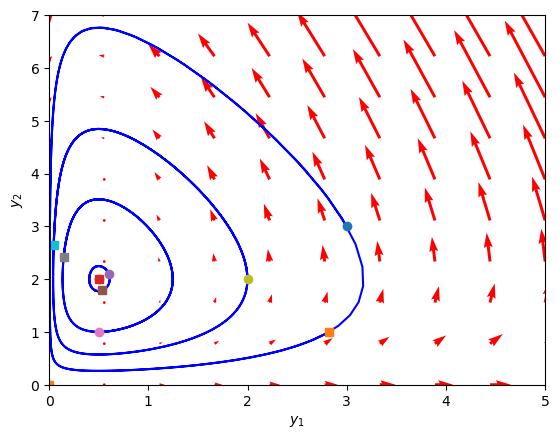

In [24]:
y1 = np.linspace(0, 5.0, 10)
y2 = np.linspace(0, 7.0, 10)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = d_2([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     

Q = plt.quiver(Y1, Y2, u, v, color='r')


for y0 in [(0, 0), (1/2, 2), (0.6, 2.1), (0.5, 1), (2, 2), (3, 3)]:
    tspan = np.linspace(0, 5.0, 300)
    ys = scp.integrate.odeint(d_2, y0, tspan)
    plt.plot(ys[:,0], ys[:,1], 'b-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
    



plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.xlim([0, 5])
plt.ylim([0, 7])
plt.show()

(0, 0) - сідло

### Розв'язуємо систему чисельними методами

In [25]:
res1 = scp.integrate.solve_ivp(d_1, t_span=(0, 30.0), y0=[12,4], dense_output=True, max_step=0.01) # x0 > y0
res2 = scp.integrate.solve_ivp(d_1, t_span=(0, 30.0), y0=[5,10], dense_output=True, max_step = 0.01) # x0 < y0

### Графік в обох випадках

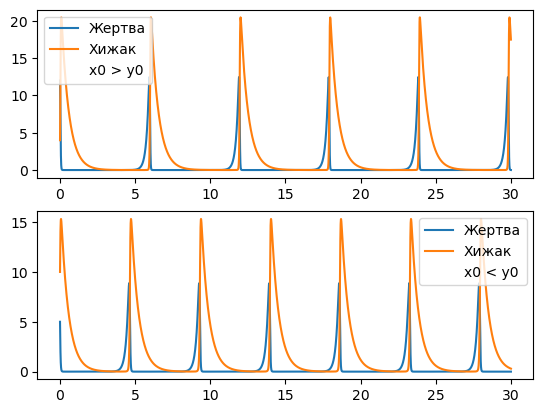

In [26]:
fig, ax = plt.subplots(2)
ax[0].plot(res1.t, res1.y[0])[0].set_label("Жертва")
ax[0].plot(res1.t, res1.y[1])[0].set_label("Хижак")
ax[0].plot(res1.t, [0]*len(res1.t), visible= False)[0].set_label("x0 > y0")
ax[0].legend()
ax[1].plot(res2.t, res2.y[0])[0].set_label("Жертва")
ax[1].plot(res2.t, res2.y[1])[0].set_label("Хижак")
ax[1].plot(res1.t, [0]*len(res1.t), visible= False)[0].set_label("x0 < y0")
ax[1].legend()
plt.show()

In [27]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

### 3d графік 

In [28]:
res1 = scp.integrate.solve_ivp(d_1, t_span=(0, 10.0), y0=[1,1], dense_output=True, max_step=0.01) 
res2 = scp.integrate.solve_ivp(d_1, t_span=(0, 10.0), y0=[0.6,2.1], dense_output=True, max_step=0.01) 
res3 = scp.integrate.solve_ivp(d_1, t_span=(0, 10.0), y0=[0.5,2], dense_output=True, max_step = 0.01)

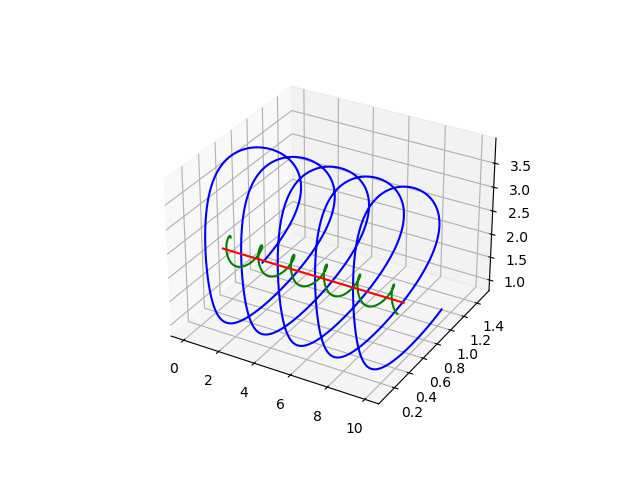

In [29]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(res1.t, res1.y[0], res1.y[1], color = 'blue')
ax.plot(res2.t, res2.y[0], res2.y[1], color = 'green')
ax.plot(res3.t, res3.y[0], res3.y[1], color = 'red')
plt.show()

### Другий випадок

In [30]:
e1 = 6
g1 = 3
b1 = 2
t = sp.symbols("t")
x, y = sp.symbols("x y", cls=sp.Function)
d1 = sp.Eq(sp.diff(x(t), t), x(t) * (e1 - g1 * y(t) -b1* x(t)))
e2 = 2
g2 = 4
d2 = sp.Eq(sp.diff(y(t), t), y(t) *(-e2 + g2 * x(t)))
sp.pprint(d1)
sp.pprint(d2)

d                                     
──(x(t)) = (-2⋅x(t) - 3⋅y(t) + 6)⋅x(t)
dt                                    
d                           
──(y(t)) = (4⋅x(t) - 2)⋅y(t)
dt                          


In [31]:
def d_1(t, Y):
    x, y = Y
    e1 = 6
    g1 = 3
    b1 = 2
    d1 = x * (e1 - g1 * y - b1 * x)
    e2 = 2
    g2 = 4
    d2 = y*(-e2 + g2 * x)
    return [d1, d2]


def d_2(Y, t):
    x, y = Y
    e1 = 6
    g1 = 3
    b1 = 2
    d1 = x * (e1 - g1 * y - b1 * x)
    e2 = 2
    g2 = 4
    d2 = y*(-e2 + g2 * x)
    return [d1, d2]


### Стаціонарні точки

In [32]:
sp.solve([d1.rhs, d2.rhs])

[{x(t): 0, y(t): 0}, {x(t): 1/2, y(t): 5/3}, {x(t): 3, y(t): 0}]

### Фазовий портрет

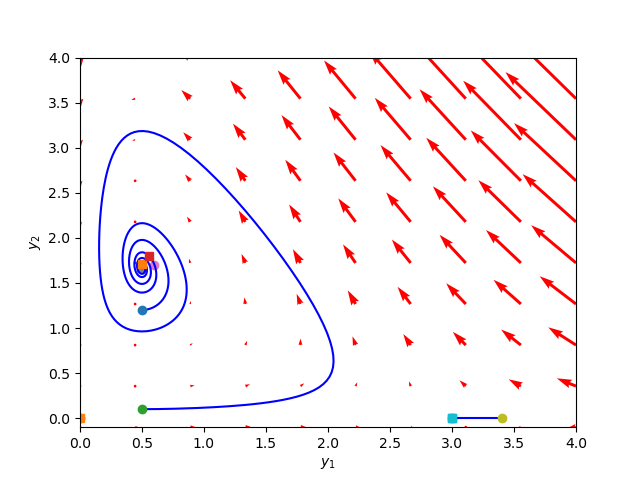

In [33]:
y1 = np.linspace(0, 4.0, 10)
y2 = np.linspace(-0.1, 4.0, 10)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

fig, ax = plt.subplots()

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = d_2([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     

Q = plt.quiver(Y1, Y2, u, v, color='r')


for y0 in [(0, 0), (1/2, 5/3), (3, 0), (0.6, 1.7), (3.4, 0), (0.5, 1.2), (0.5, 0.1)]:
    tspan = np.linspace(0, 5.0, 300)
    ys = scp.integrate.odeint(d_2, y0, tspan)
    plt.plot(ys[:,0], ys[:,1], 'b-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
    



plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.xlim([0, 4])
plt.ylim([-0.1, 4])
plt.show()

(0, 0), (0.5, 5/3) - сідла , (3, 0) - особлива точка (сідло по осі y = 0)

### Розв'язуємо систему чисельними методами

In [34]:
res1 = scp.integrate.solve_ivp(d_1, t_span=(0, 30.0), y0=[12,4], dense_output=True, max_step=0.01) # x0 > y0
res2 = scp.integrate.solve_ivp(d_1, t_span=(0, 30.0), y0=[5,10], dense_output=True, max_step = 0.01) # x0 < y0

### Графік в обох випадках

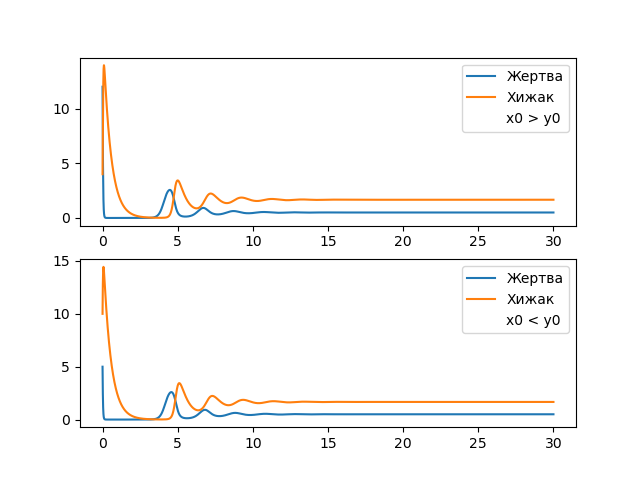

In [35]:
fig, ax = plt.subplots(2)
ax[0].plot(res1.t, res1.y[0])[0].set_label("Жертва")
ax[0].plot(res1.t, res1.y[1])[0].set_label("Хижак")
ax[0].plot(res1.t, [0]*len(res1.t), visible= False)[0].set_label("x0 > y0")
ax[0].legend()
ax[1].plot(res2.t, res2.y[0])[0].set_label("Жертва")
ax[1].plot(res2.t, res2.y[1])[0].set_label("Хижак")
ax[1].plot(res1.t, [0]*len(res1.t), visible= False)[0].set_label("x0 < y0")
ax[1].legend()
plt.show()

### 3d графік 

In [36]:
res1 = scp.integrate.solve_ivp(d_1, t_span=(0, 10.0), y0=[1,1], dense_output=True, max_step=0.01) 
res2 = scp.integrate.solve_ivp(d_1, t_span=(0, 10.0), y0=[0.6,2.1], dense_output=True, max_step=0.01) 
res3 = scp.integrate.solve_ivp(d_1, t_span=(0, 10.0), y0=[0.5,5/3], dense_output=True, max_step = 0.01)

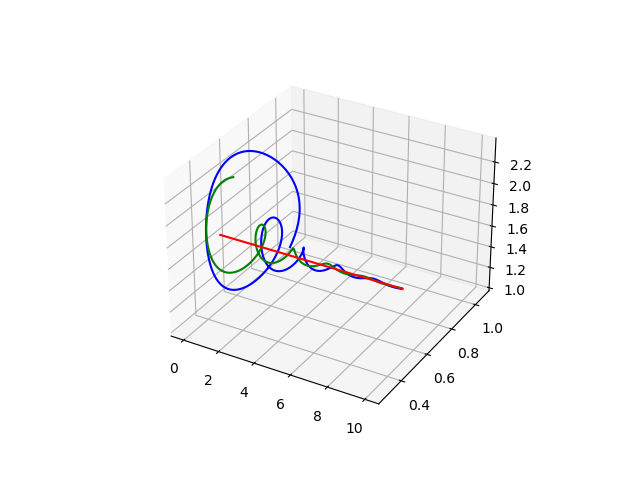

In [37]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(res1.t, res1.y[0], res1.y[1], color = 'blue')
ax.plot(res2.t, res2.y[0], res2.y[1], color = 'green')
ax.plot(res3.t, res3.y[0], res3.y[1], color = 'red')
plt.show()